In [1]:
import h5py
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt 
from scipy.signal import spectrogram
from scipy.io import savemat

In [2]:
data = loadmat(r'C:\Users\congy\Desktop\Gritton_Lab\Katamine_Data\622\trial_info.mat')

In [103]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'trialinfo'])

In [114]:
data['trialinfo'].shape

(1, 2)

In [113]:
data['trialinfo'].dtype.names

('TSClean', 'TSMasked')

In [115]:
data['trialinfo'][0,0].dtype.names

('TSClean', 'TSMasked')

In [4]:
# Each element (like data['trialinfo'][0,0]) is a single record (not an array) that holds multiple fields — 
# in this case, two: 'TSClean' and 'TSMasked'.
data['trialinfo'][0,0].shape

()

In [116]:
data['trialinfo'][0,0]['TSClean'].shape

(4, 2)

In [20]:
Clean_array_00_0idx = np.concatenate([data['trialinfo'][0, 0]['TSClean'][0][0],
               data['trialinfo'][0, 0]['TSClean'][1][0],
               data['trialinfo'][0, 0]['TSClean'][2][0],
               data['trialinfo'][0, 0]['TSClean'][3][0]])
print(Clean_array_00_0idx)

Clean_array_00_1idx = np.concatenate([data['trialinfo'][0, 0]['TSClean'][0][1],
               data['trialinfo'][0, 0]['TSClean'][1][1],
               data['trialinfo'][0, 0]['TSClean'][2][1],
               data['trialinfo'][0, 0]['TSClean'][3][1]])

print('\n', Clean_array_00_1idx)

Clean_array_01_0idx = np.concatenate([data['trialinfo'][0, 1]['TSClean'][0][0],
               data['trialinfo'][0, 1]['TSClean'][1][0],
               data['trialinfo'][0, 1]['TSClean'][2][0],
               data['trialinfo'][0, 1]['TSClean'][3][0]])

print('\n', Clean_array_01_0idx)

Clean_array_01_1idx = np.concatenate([data['trialinfo'][0, 1]['TSClean'][0][1],
               data['trialinfo'][0, 1]['TSClean'][1][1],
               data['trialinfo'][0, 1]['TSClean'][2][1],
               data['trialinfo'][0, 1]['TSClean'][3][1]])

print('\n', Clean_array_01_1idx)

[[ 142.03301215]
 [ 287.032938  ]
 [ 477.03284073]
 [ 627.03276372]
 [ 972.03258729]
 [1162.03249002]
 [1217.03246164]
 [1412.03236198]
 [1642.03224421]
 [1812.03215718]
 [ 157.03300452]
 [ 282.03294039]
 [ 582.03278685]
 [ 802.03267431]
 [ 882.0326333 ]
 [1092.03252578]
 [1257.03244138]
 [1552.03229022]
 [1682.0322237 ]
 [1922.03210068]
 [  37.0330658 ]
 [ 367.032897  ]
 [ 532.03281236]
 [ 607.03277397]
 [ 857.03264618]
 [1172.03248477]
 [1367.03238487]
 [1492.03232098]
 [1772.03217769]
 [1987.03206754]
 [ 162.0330019 ]
 [ 372.03289437]
 [ 517.03282022]
 [ 752.03269982]
 [ 887.03263068]
 [1132.03250527]
 [1207.03246689]
 [1482.03232598]
 [1767.03218007]
 [1957.0320828 ]]

 [[ 102.03303266]
 [ 357.032902  ]
 [ 442.03285861]
 [ 767.03269219]
 [ 922.0326128 ]
 [1077.03253341]
 [1212.03246427]
 [1422.03235674]
 [1787.03216982]
 [1857.03213406]
 [  17.03307605]
 [ 257.03295326]
 [ 572.03279209]
 [ 747.03270245]
 [ 862.03264356]
 [1192.03247452]
 [1372.03238249]
 [1537.03229785]
 [1777.0321

In [21]:
with h5py.File(r'C:\Users\congy\Desktop\Gritton_Lab\Katamine_Data\622\downsampled_LFP.mat', 'r') as f:
    fs = 24414.0625 / 20  # 1220.703125 Hz

    # This loads the entire dataset into memory in one call.
    data = f['data_combine_Low_downsample']
    

    
    ch_dict = {}  # dict with key of 32 channels and the corresponding segments on the signal
   
    trans_Clean_array_01_0idx = Clean_array_01_0idx.T
    for ch in range(data.shape[1]):
        channel_data = data[:, ch]
        indices = [(int((int(arr)-1)*fs), int((int(arr)+4)*fs)) for arr in trans_Clean_array_01_0idx[0]]
        lst = [channel_data[start: stop] for (start, stop) in indices]
        ch_dict[ch+1] = lst
        

    print(ch_dict.keys())
    print(len(ch_dict[1][0]))

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])
6103


[ 3.83318541e-05  4.16322819e-05  4.55935982e-05 ... -3.33408295e-05
 -3.02229087e-05 -2.75458347e-05]


(0.0, 5.0)

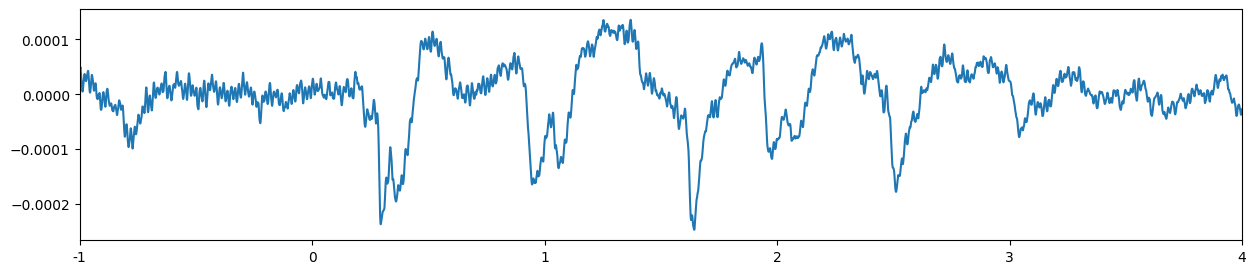

In [27]:
grand_signal = None
grand_mean_signal =None


for ch_num in ch_dict.keys():   
    
    min_length = min(arr.shape[0] for arr in ch_dict[ch_num])

    
    trimmed_lst = [arr[:min_length] for arr in ch_dict[ch_num]]
    summed_signal = np.sum(trimmed_lst, axis=0)
    mean_signal = summed_signal/40

    if grand_signal is None:
        grand_signal = np.zeros_like(mean_signal)
    grand_signal += mean_signal

if grand_mean_signal is None:
    grand_mean_signal = grand_signal/32    


plt.figure(figsize=(15, 3)) 

fs = 24414.0625 / 20  # 1220.703125 Hz



duration = 5 
samples = int(duration * fs)

time_axis = np.arange(samples) / fs  
    
print(grand_mean_signal) 



    
plt.plot(time_axis, grand_mean_signal)
labels = ['-1', '0', '1', '2', '3', '4'] 
ticks = np.linspace(0, 5, 6)
plt.xticks(ticks, labels)
plt.xlim(0, 5)


In [49]:
# h5py objects like f['data_combine_Low_downsample'] are lazy readers.
with h5py.File(r'C:\Users\congy\Desktop\Gritton_Lab\Katamine_Data\622\downsampled_LFP.mat', 'r') as f:


    # This loads the entire dataset into memory in one call.
    # [:] → like NumPy slicing, only works for plain numeric datasets
    # [()] → read the entire dataset, including structured or object data
    sig_data = f['data_combine_Low_downsample'][()]
    print(sig_data.shape)
trial_data = loadmat(r'C:\Users\congy\Desktop\Gritton_Lab\Katamine_Data\622\trial_info.mat')
print(type(trial_data))
print(trial_data.keys())



class Signal:
    
    # using 4 spaces indentation inside the class
    """
    Signal class for managing and processing trial-based LFP (local field potential) signal data.

    Attributes:
        sig_data (ndarray): The full signal dataset with the shape of (4968346, 32).
        trial_data (dict): Dictionary containing trial information(e.g.'trialinfo'.)
        condition (str): 'TSClean', 'TSMasked'
        trial_row (int): Row index for accessing trial data(only has 0, just one row).
        trial_column (int): Column index for accessing trial data(contain 0 and 1, two column: awake and anethetized).
        trial_idx (int): target 1 or target 2.
        fs (float): Sampling frequency of the signal (default is 1220.703125 Hz).
    """
    
    
    #Storing constants and configuration values inside the class, rather than defining them as global variables.
    def __init__(self, sig_data, trial_data, condition, trial_row, trial_column, trial_idx, fs = 24414.0625 / 20):
        
        
        """
        Initialize the Signal object with signal and trial data.

        Args:
            sig_data (ndarray): Array of signal recordings with the shape of (4968346, 32). (e.g., downsampled LFP).
            trial_data (dict): Trial metadata loaded from a .mat file.
            condition (str): 'TSClean', 'TSMasked'
            trial_row (int): Row index for accessing trial data(only has 0, just one row).
            trial_column (int): Column index for accessing trial data(contain 0 and 1, two column: awake and anethetized)
            trial_idx (int): target 1 or target 2.
            fs (float, optional): Sampling frequency of the signal. Defaults to 24414.0625 / 20.
        """
        
        self.sig_data = sig_data
        self.trial_data = trial_data
        self.condition = condition
        self.trial_row = trial_row
        self.trial_column = trial_column
        self.trial_idx = trial_idx
        self.fs = fs
        
        
    def slicing_and_concatenate(self):
        
        """
        Extracts and concatenates trial onset timestamps across four trial repetitions based on trial info in trial_data

        Returns:
            np.ndarray: A 1D array of concatenated onset times from 4 trial instances
                        associated with the given condition, trial_row, trial_column, and trial_idx.
        """
        
        
        trial_info = self.trial_data['trialinfo'][self.trial_row, self.trial_column][self.condition]
        trial_lst = [trial_info[i][self.trial_idx] for i in range(4)]
        new_array = np.concatenate(trial_lst)
#         new_array = np.concatenate([
#             trial_info[0][self.trial_idx],
#             trial_info[1][self.trial_idx],
#             trial_info[2][self.trial_idx],
#             trial_info[3][self.trial_idx]])
        #print(new_array)
        return new_array


    def channel_dict_buildup(self):
        
        
        """
        Builds a dictionary containing LFP signal segments per channel, sliced using
        the onset timestamps extracted from the trial data.

        Each key in the dictionary corresponds to a channel (1 to 32), and each value is a list of
        signal segments (from -1s to +4s around each onset) for that channel.

        Returns:
            dict: Dictionary of the form {channel_number: a list of 10 signal segments}
        """
        
        
        ch_dict = {}  # dict with key of 32 channels and the corresponding segments on the signal

        trans_array = self.slicing_and_concatenate().T  
        for ch in range(self.sig_data.shape[1]):
            channel_data = self.sig_data[:, ch]
            indices = [(int((int(arr)-1)*self.fs), int((int(arr)+4)*self.fs)) for arr in trans_array[0]]
            lst = [channel_data[start: stop] for (start, stop) in indices]
            ch_dict[ch+1] = lst
        return ch_dict

    def get_grand_mean_signal(self):
        
        """
        Calculate the grand mean of signal
        
        loop through each channel, find out the minimum length in the ten signal segments, truncate ten segments into the 
        same length, sum them up and take the average
        
        Having mean signal for each channel and then average them to get the grand mean for 32 channel
        
        
        Returns:
            float: the average of mean signal for 32 channels
        
        """
        grand_signal = None


        ch_dict = self.channel_dict_buildup()
        for ch_num in ch_dict.keys():   

            min_length = min(arr.shape[0] for arr in ch_dict[ch_num])


            trimmed_lst = [arr[:min_length] for arr in ch_dict[ch_num]]
            summed_signal = np.sum(trimmed_lst, axis=0)
            mean_signal = summed_signal/len(trimmed_lst)

            if grand_signal is None:
                grand_signal = np.zeros_like(mean_signal)
            grand_signal += mean_signal
            #print(grand_signal)
#         if grand_mean_signal is None:
            
        return grand_signal/len(ch_dict)   
 




        


    def plot_grand_mean_signal(self):
        
        """
        Plots the grand mean LFP signal.

        The plot spans a 5-second window (aligned from -1 to +4 seconds relative to event onset).
        The x-axis is labeled in seconds, and the y-axis represents signal amplitude.

        Returns:
            None
        """
        
        
        plt.figure(figsize=(15, 3)) 


        duration = 5 
        samples = int(duration * self.fs)

        time_axis = np.arange(samples) / self.fs  





        plt.plot(time_axis, self.get_grand_mean_signal())
        labels = ['-1', '0', '1', '2', '3', '4'] 
        ticks = np.linspace(0, 5, 6)
        plt.xticks(ticks, labels)
        plt.xlim(0, 5)

        
        
        
        

(4968346, 32)
<class 'dict'>
dict_keys(['__header__', '__version__', '__globals__', 'trialinfo'])


In [ ]:
# When you epoch, you're just extracting segments (e.g., -1s to +4s) around specific timestamps. 
# Each condition pulls a different list of such timestamps from the structured trial data, even though all 
# those events occurred in the same underlying signal.

In [50]:
Signal(sig_data, trial_data,'TSClean', 0, 0, 0).get_grand_mean_signal()

array([-4.59389432e-05, -4.41738726e-05, -3.39276866e-05, ...,
       -1.80936888e-05, -2.36737103e-05, -2.74730810e-05])

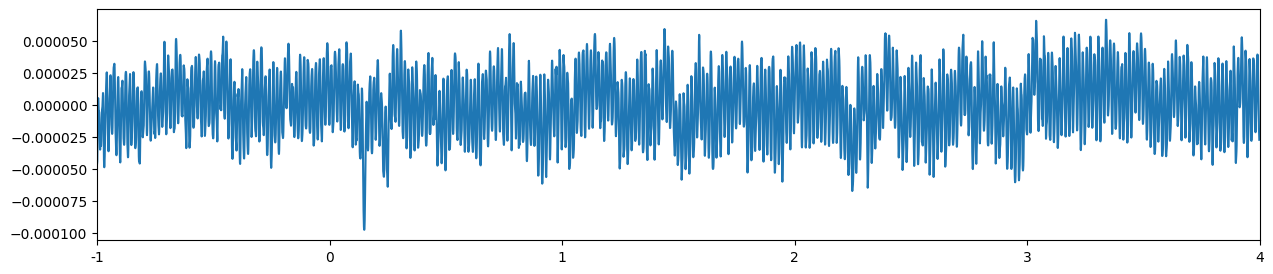

In [51]:
# clean awake target 1
# Default (uses 24414.0625 / 20)
Signal(sig_data, trial_data,'TSClean', 0, 0, 0).plot_grand_mean_signal()

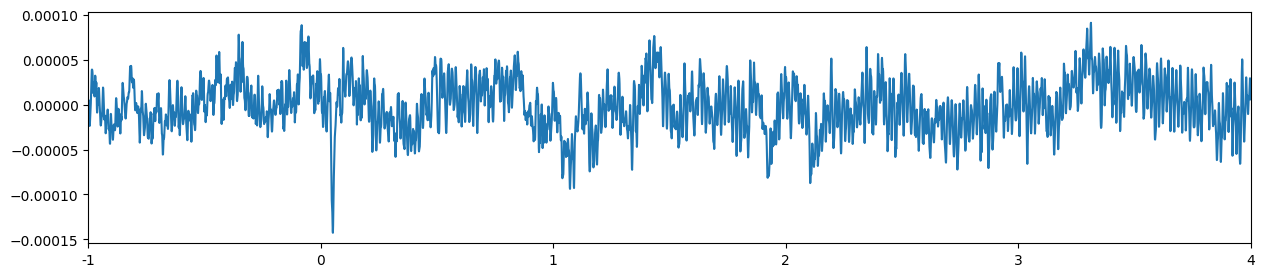

In [52]:
# Masker awake target 1
Signal(sig_data, trial_data,'TSMasked', 0, 0, 0).plot_grand_mean_signal()

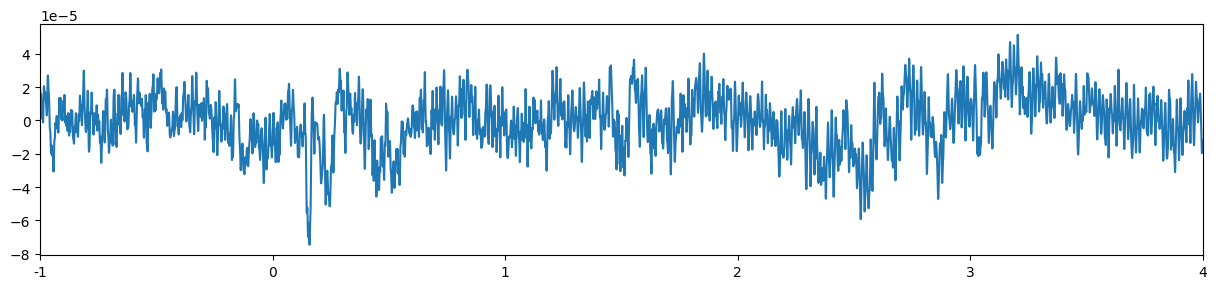

In [53]:
# clean awake target 2
Signal(sig_data, trial_data, 'TSClean', 0, 0, 1).plot_grand_mean_signal()

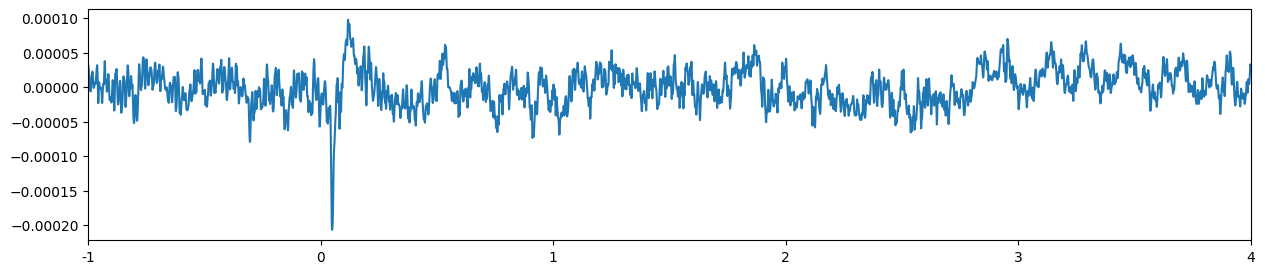

In [54]:
# Masker awake target 2
Signal(sig_data, trial_data,'TSMasked', 0, 0, 1).plot_grand_mean_signal()

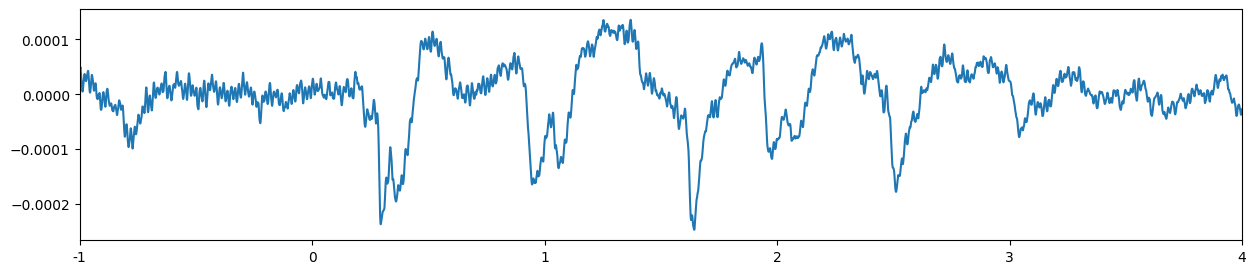

In [55]:
# clean anathetized target 1
Signal(sig_data, trial_data, 'TSClean', 0, 1, 0).plot_grand_mean_signal()

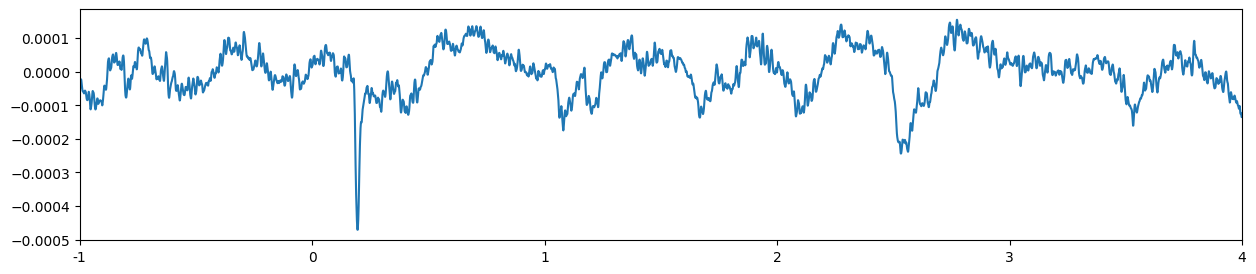

In [56]:
# masker anathetized target 1
Signal(sig_data, trial_data,'TSMasked', 0, 1, 0).plot_grand_mean_signal()

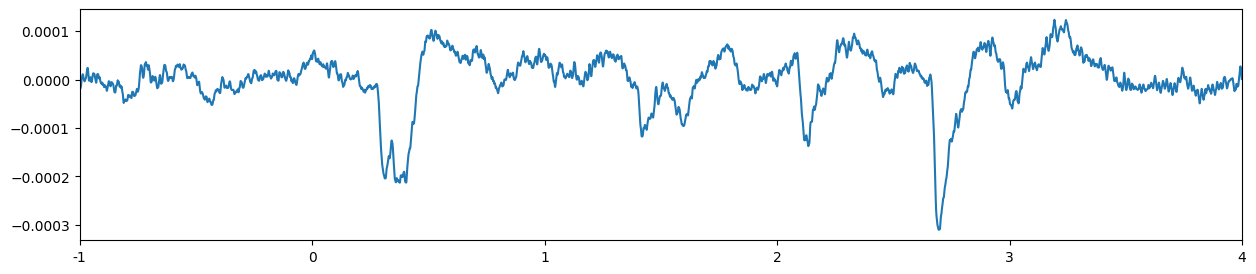

In [57]:
# clean anathetized target 2
Signal(sig_data, trial_data, 'TSClean', 0, 1, 1).plot_grand_mean_signal()

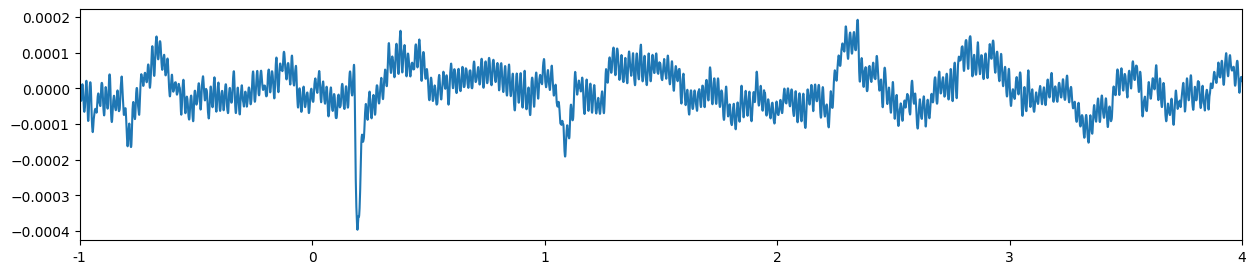

In [58]:
# masker anathetized target 2
Signal(sig_data, trial_data,'TSMasked', 0, 1, 1).plot_grand_mean_signal()